# Taller: Análisis de Tendencias para Google y Microsoft

En este taller analizaremos los datos de precios para Google y Microsoft (símbolos `GOOGL` y `MSFT`) utilizando la base `prices.csv`.

El objetivo es:

- Filtrar los datos para estas dos empresas.
- Convertir la columna de fecha de forma robusta, ya que diferentes empresas pueden tener distintos formatos de fecha.
- Ordenar los datos por fecha.
- Aplicar un suavizado (media móvil) para ver la tendencia general durante el periodo (máximo 2016).
- Generar una gráfica final que integre un storytelling (Setup, Conflict y Resolution) en el análisis de la tendencia.

Responde las siguientes preguntas en el proceso:

1. ¿Cuáles son el primer y último año del dataset para las empresas seleccionadas?
2. ¿Cuántas observaciones tienes para cada empresa?
3. ¿Qué tendencia se observa tras aplicar el suavizado?


In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
!unzip time_series.zip
!cp -r time_series/* ./

--2025-04-14 20:06:36--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/time_series.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip [following]
--2025-04-14 20:06:36--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/time_series.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15602616 (15M) [application/zip]
Saving to: ‘time_series.zip’

time_series.zip     100%[===================>]  14.88M  52.9MB/s    in 0.3s    

2025-04-14 20:06:37 (52.9 MB/s) - ‘time

## Paso 1: Carga del Dataset y Filtrado de Empresas

Carga el archivo `prices.csv` y filtra únicamente los datos correspondientes a Google y Microsoft.

Pregunta: ¿Qué cantidad de observaciones tienes para cada empresa después del filtrado?

In [3]:
import pandas as pd
df = pd.read_csv("time_series/prices.csv")
df_filtered = df[df['symbol'].isin(['GOOGL', 'MSFT'])]
print(df_filtered['symbol'].value_counts())


symbol
GOOGL    1762
MSFT     1762
Name: count, dtype: int64


## Paso 2: Conversión Robust a Formato Datetime

Dado que diferentes empresas podrían tener formatos de fecha distintos, convertiremos la columna `date` usando `pd.to_datetime` sin forzar un formato fijo.

Elimina las filas que no se puedan convertir (donde la fecha es `NaT`).

Pregunta: ¿Cuántas filas se descartan por tener fechas inválidas?

In [4]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')
before = df_filtered.shape[0]
df_filtered = df_filtered.dropna(subset=['date'])
after = df_filtered.shape[0]
print(f"Filas descartadas por fechas inválidas: {before - after}")

Filas descartadas por fechas inválidas: 0


<ipython-input-4-7565118a6e9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')


## Paso 3: Ordenar Datos y Análisis Inicial

Ordena los datos por la columna `date` para cada empresa y determina:

- ¿Cuál es el primer año y el último año para cada empresa?
- ¿Cuántas observaciones hay en total para el periodo (recordando que la fecha máxima es 2016)?

In [5]:
df_filtered = df_filtered.sort_values(by='date')
df_filtered = df_filtered[df_filtered['date'].dt.year <= 2016]
for symbol in ['GOOGL', 'MSFT']:
    dates = df_filtered[df_filtered['symbol'] == symbol]['date']
    print(f"{symbol}: {dates.min().year} - {dates.max().year}")
print(df_filtered['symbol'].value_counts())


GOOGL: 2010 - 2016
MSFT: 2010 - 2016
symbol
GOOGL    1762
MSFT     1762
Name: count, dtype: int64


## Paso 4: Visualización Inicial (Setup) – Gráfica de Precios de Cierre

Construye una gráfica inicial que muestre el precio de cierre a lo largo del tiempo para Google y Microsoft.

Utiliza un título multi-línea que comunique la etapa Setup. Por ejemplo:

```
Setup: Serie de Precios sin Suavizado
Datos originales para Google y Microsoft
CONFLICT: IDENTIFICAR MOVIMIENTOS ATÍPICOS
```

Pregunta: ¿Qué diferencias notas entre las series de ambas empresas?

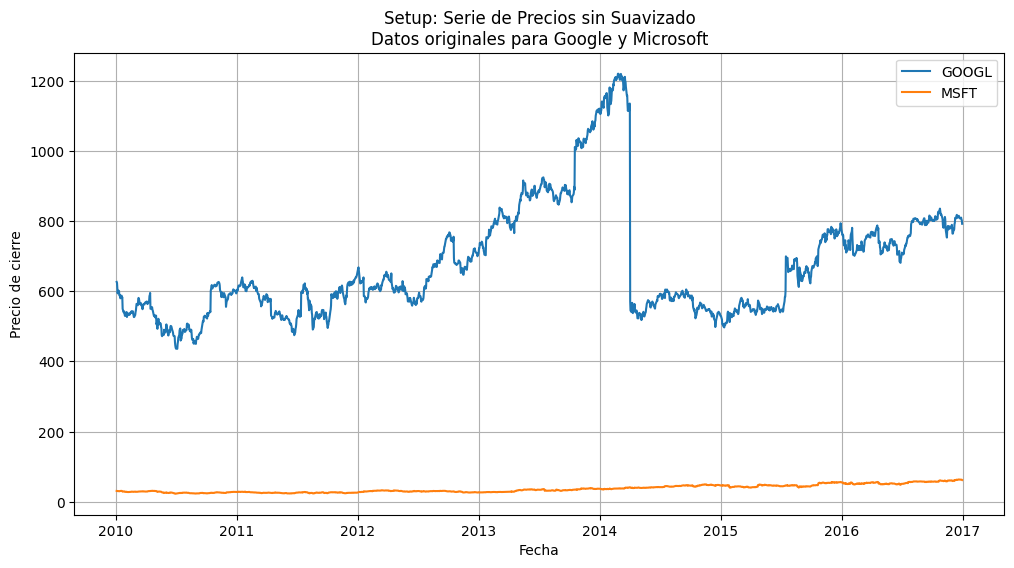

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for symbol in ['GOOGL', 'MSFT']:
    subset = df_filtered[df_filtered['symbol'] == symbol]
    plt.plot(subset['date'], subset['close'], label=symbol)

plt.title("Setup: Serie de Precios sin Suavizado\nDatos originales para Google y Microsoft")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.grid(True)
plt.show()

## Paso 5: Aplicar Suavizado (Resolution) – Media Móvil y Análisis de Tendencia

Aplica un suavizado a las series (por ejemplo, una media móvil) para resaltar la tendencia general en los datos.

Pregunta: ¿Qué ventana de suavizado (en días) consideras adecuada para observar la tendencia en el año 2016? ¿Cómo se comporta la tendencia para Google y Microsoft después de suavizar los datos?

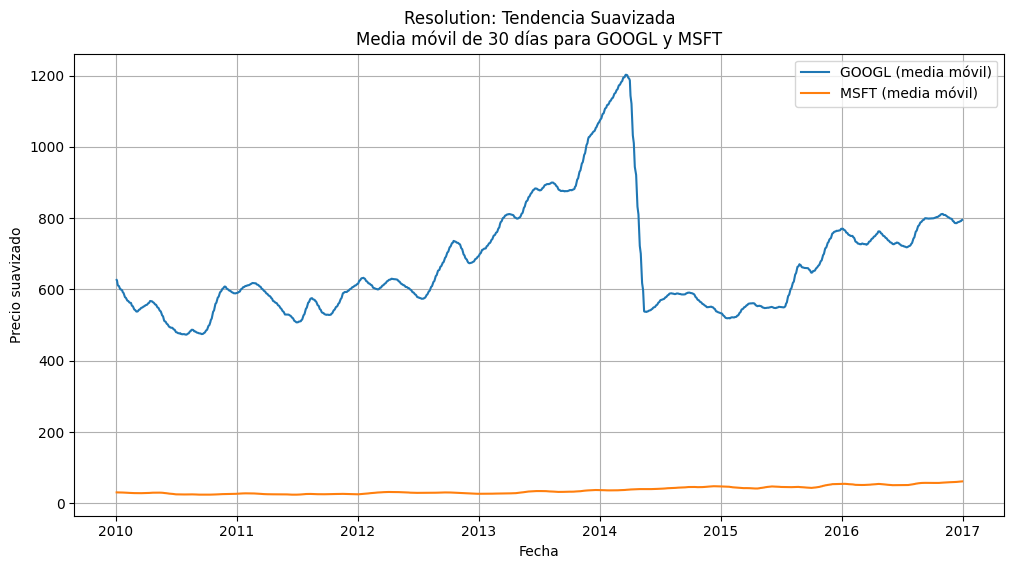

In [7]:
window = 30
df_filtered['moving_avg'] = df_filtered.groupby('symbol')['close'].transform(lambda x: x.rolling(window=window, min_periods=1).mean())
plt.figure(figsize=(12,6))
for symbol in ['GOOGL', 'MSFT']:
    subset = df_filtered[df_filtered['symbol'] == symbol]
    plt.plot(subset['date'], subset['moving_avg'], label=f"{symbol} (media móvil)")

plt.title("Resolution: Tendencia Suavizada\nMedia móvil de 30 días para GOOGL y MSFT")
plt.xlabel("Fecha")
plt.ylabel("Precio suavizado")
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones y Entrega

En este taller se ha realizado lo siguiente:

- Se cargaron los datos y se filtraron únicamente para las empresas Google y Microsoft.
- Se convirtió la columna `date` de forma robusta, eliminando filas con fechas inválidas.
- Se ordenaron los datos cronológicamente y se obtuvieron información general (primer y último año, número de observaciones por empresa).
- Se construyó una gráfica de storytelling con dos etapas:
  - **Setup:** Visualización inicial de los precios de cierre originales para Google y Microsoft.
  - **Resolution:** Aplicación de un suavizado (media móvil) para resaltar la tendencia general.

Tu entrega final debe incluir las gráficas generadas y una breve explicación de cada paso, respondiendo las preguntas planteadas en el taller.